<a href="https://colab.research.google.com/github/diiannic/Diabetes-Data-Science/blob/master/(Cole_and_MA_1_20_2_20)_putting_time_into_practice_and_cleaning_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ReadMe

Put New (in order) glucose bin creation function in and will continue cleaning/checking the code

Add filling in of the previous/next bin to  elif statement in CreateGlucoseBins() (labeled with a comment)


UPDATE: Cole made edited the document to get rid of ALL timezone changes and changed the if "new" to if "old then reverse in the creating glucose bins function


# Installation and Importation

Each of the pip installations may take a minute or two.  

In [0]:
pip install scipy==1.2 --upgrade

     |████████████████████████████████| 26.6MB 77.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [0]:
pip install -U statsmodels

     |████████████████████████████████| 8.7MB 2.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [0]:
# Importing Cell
import pylab,numpy 
from dateutil.parser import * #formats date strings into datetimes
from datetime import * # this allows for use of datetime objects
import math
import os # importing files
import sys # importing files
import importlib # importing libraries
from importlib import util
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization
import statistics #Median usage
import scipy
from scipy import stats
import pytz  
from sklearn.cluster import KMeans               # kmeans clustering
from sklearn import metrics                      # kmeans clustering
from scipy.spatial.distance import cdist         # kmeans clustering
import warnings
import itertools
import statsmodels.api as sm 
import pandas as pd
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import fcluster

#Load Google Drive

Once this cell is run, it will ask for an authorization code, thus checking that you are authorized to access/use the data. Follow the link, and enter your authorization code.

This step may take one or two minutes.

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
  
sys.path.append('/content/drive/Shared drives/Diabetes Data Science 2019')
import tryit
tryit.doit()

import sys
sys.path.append('/content/drive/Shared drives/Diabetes Data Science 2019')

import functionTest
functionTest.doit()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


ModuleNotFoundError: ignored

# Download Data to Colab

Run the following cells in this section, Creating Bin Functionsup until Main(); they should take almost no time at all to run.

In [0]:
def ImportFileNames(csvName): # Good to go

  df = pd.read_csv(csvName)
  """
  Creates the original three lists of data from the selected CSV file.  
  cgm: continuous blood glucose mmol/liter
  bas: basal in units/hour
  bol: bolus in units
  """

  old = df.old
  old = old[0:6]
  new = df.new
  
  return old, new

In [0]:
# load tidals package locally if it does not exist globally
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
description: example script of how to load the tidals package
created: 2018-02-21
author: Ed Nykaza
license: BSD-2-Clause
"""

"""
Loads desired person's diabetes CSV file, and makes it accessible for data 
extraction, assuming that we have loaded in the CSVs to the google drive.

Also returns the correct size of the bins based on the cbg, basal, and bolus.
"""

def ImportData(csvName, dataType): # Good to go

  df = pd.read_csv(csvName)
  """
  Creates the original three lists of data from the selected CSV file.  
  cgm: continuous blood glucose mmol/liter
  bas: basal in units/hour
  bol: bolus in units
  """

  cgm = df.loc[df.type == "cbg", ["time", "value"]]
  bas = df.loc[df.type == "basal", ["time", "rate", "duration"]]
  bol = df.loc[df.type == "bolus", ["time", "normal"]]
      
  #Checking for what the greatest start and end bounds between glucose, basal, and bolus
  
  #glucose
  if (dataType == "new"):
    startGlucoseTime = cgm["time"][int(cgm.index[0])]
    endGlucoseTime = cgm["time"][int(cgm.index[-1])]
  else:
    endGlucoseTime = cgm["time"][int(cgm.index[0])]
    startGlucoseTime = cgm["time"][int(cgm.index[-1])]
    
  startGlucoseTime = parse(startGlucoseTime) # parses time strings into datetime values
  startGlucoseTime = startGlucoseTime.replace(microsecond = 0, tzinfo=pytz.UTC)  
  startGlucoseTime = startGlucoseTime.replace(tzinfo=None)
  
  endGlucoseTime = parse(endGlucoseTime) # parses time strings into datetime values
  endGlucoseTime = endGlucoseTime.replace(microsecond = 0, tzinfo=pytz.UTC)  
  endGlucoseTime = endGlucoseTime.replace(tzinfo=None)

  #basal
  if (dataType == "new"):
    startBasalTime = bas["time"][int(bas.index[0])]
    endBasalTime = bas["time"][int(bas.index[-1])]
  else:
    endBasalTime = bas["time"][int(bas.index[0])]
    startBasalTime = bas["time"][int(bas.index[-1])]

  startBasalTime = parse(startBasalTime) # parses time strings into datetime values
  startBasalTime = startBasalTime.replace(microsecond = 0, tzinfo=pytz.UTC)  
  startBasalTime = startBasalTime.replace(tzinfo=None) 
  
  endBasalTime = parse(endBasalTime) # parses time strings into datetime values
  endBasalTime = endBasalTime.replace(microsecond = 0, tzinfo=pytz.UTC)  
  endBasalTime = endBasalTime.replace(tzinfo=None) 
  
  #bolus
  if (dataType == "new"):
    startBolusTime = bol["time"][int(bol.index[0])]
    endBolusTime = bol["time"][int(bol.index[-1])]
  else:
    endBolusTime = bol["time"][int(bol.index[0])]
    startBolusTime = bol["time"][int(bol.index[-1])]

  startBolusTime = parse(startBolusTime) # parses time strings into datetime values
  startBolusTime = startBolusTime.replace(microsecond = 0, tzinfo=pytz.UTC)  
  startBolusTime = startBolusTime.replace(tzinfo=None) 
  
  endBolusTime = parse(endBolusTime) # parses time strings into datetime values
  endBolusTime = endBolusTime.replace(microsecond = 0, tzinfo=pytz.UTC)  
  endBolusTime = endBolusTime.replace(tzinfo=None)
  
  if (startGlucoseTime < startBasalTime):
    if (startGlucoseTime < startBolusTime):
      startBinDatetime = startGlucoseTime
    else:
      startBinDatetime = startBolusTime
  else:
    if (startBasalTime < startBolusTime):
      startBinDatetime = startBasalTime
    else:
      startBinDatetime = startBolusTime
      
  if (endGlucoseTime > endBasalTime):
    if (endGlucoseTime > endBolusTime):
      endBinDatetime = endGlucoseTime
    else:
      endBinDatetime = endBolusTime
  else:
    if (endBasalTime > endBolusTime):
      endBinDatetime = endBasalTime
    else:
      endBinDatetime = endBolusTime
  
  #standardizes start and end dates to midnight with buffer
  startBinDatetime = datetime(startBinDatetime.year, startBinDatetime.month, startBinDatetime.day, 0, 0)
  endBinDatetime = datetime(endBinDatetime.year, endBinDatetime.month, endBinDatetime.day, 0, 0) + timedelta(days = 1)
  return cgm, bas, bol, startBinDatetime, endBinDatetime

# Creating Bin Functions



In [0]:
"""
This function puts the glucose data into a usable form for modeling and analysis.
We break the dates from the start of recorded data, to the end, into 5 minute 
intervals, and fill in each 'bin' with its associated blood glucose value.
We perform a weighted average by calculating the midpoint between the current 
time and its two neighbors and, assuming that the gap between said neighbors 
is less than 10 minutes, we add in the glucose value to the designated bins.
If a bin is not entirely full, then it is considered an empty bin.

@newData: type of data (as in the old data)
@tz: the time zone the person to whom these glucose bin belongs lives in
"""
  
def CreateGlucoseBins(newData, startBinDatetime, endBinDatetime):
  """
  Puts the data into a 2 dimensional list: totalBolusDayList; it contains:
    - a list of times in a special python form.
    - a list of glucose levels
  The index of the times and glucose levels match up such that each time is 
  associated with a particular glucose value.
  """
  totalGlucoseDayList = [[], []]
  for i in range(len(cgm["time"])):
    totalGlucoseDayList[0].append(cgm["time"][int(cgm.index[i])]) 
    totalGlucoseDayList[1].append(float(cgm["value"][int(cgm.index[i])]) * 18)
    
  if (newData == "old"):  
    totalGlucoseDayList[0].reverse()
    totalGlucoseDayList[1].reverse()  
    
  """
  Within the TIME list, we put the times into a more usable form, from the 
  weird python formatting, to a dateTime object that looks like:

  (year, month, day, hour, minute, second)

  This also cuts off the microseconds and time zone information
  """

  for i in range(len(totalGlucoseDayList[0])):
    totalGlucoseDayList[0][i] = parse(totalGlucoseDayList[0][i]) # parses time strings into datetime values
    totalGlucoseDayList[0][i] = totalGlucoseDayList[0][i].replace(microsecond = 0, tzinfo=pytz.UTC)  
    totalGlucoseDayList[0][i] = totalGlucoseDayList[0][i].replace(tzinfo=None) 

  
  countDatetime = startBinDatetime
  datetimeBin = []
  glucoseBinList = []

  while (countDatetime != endBinDatetime): # while the count time is not 5 mins past the last day in the sequence
    weekno = countDatetime.weekday()
    if weekno<5:
      day = "Weekday"
    else:
      day = "Weekend"
    datetimeBin = [countDatetime, None, datetime(1, 1, 1, 0, 0), day] # time at bin (lower bound), BG value of bin, portion of bin which has been filled
    glucoseBinList.append(datetimeBin)
    countDatetime = countDatetime + timedelta(minutes=5)
    

  for i in range(len(totalGlucoseDayList[0])):

    #number of seconds between now and starting date
    curDateSeconds = ((totalGlucoseDayList[0][i] - startBinDatetime).days * 24 * 60 * 60) + ((totalGlucoseDayList[0][i] - startBinDatetime).seconds)
    #timedelta only has capability to return in terms of days and seconds
    if (i == 0): #totalGlucoseDayList is in reverse chronological order, so prevDateDif is at end
      prevDateDif = 100000000 #make unreasonably large so it doesn't affect data
    else:
      prevDateSeconds = ((totalGlucoseDayList[0][i-1] - startBinDatetime).days * 24 * 60 * 60) + ((totalGlucoseDayList[0][i-1] - startBinDatetime).seconds)
      prevDateDif = curDateSeconds - prevDateSeconds
    if (i == len(totalGlucoseDayList[0]) - 1):
      nextDateDif = 100000000
    else:
      nextDateSeconds = ((totalGlucoseDayList[0][i+1] - startBinDatetime).days * 24 * 60 *60) + ((totalGlucoseDayList[0][i+1] - startBinDatetime).seconds)
      nextDateDif = nextDateSeconds - curDateSeconds
    #declare binIndex to be the bin that the current date is based in
    binIndex = int((curDateSeconds / 60) // 5) # / 60 is to convert from seconds to minutes; // 5 is to convert to 5 minute intervals
    

    if (prevDateDif <= 600): #General case (prevDate is less than 10 min away - midpoint is witin 5 min); find midpoint
      #declare midpoint
      midpoint = startBinDatetime + timedelta(seconds = prevDateSeconds + (prevDateDif/2)) #convert to datetime object for arithmetic
      
      if (midpoint >= glucoseBinList[binIndex][0]):
        #adds the weighted glucose value to the current bin in between the current time and the midpoint.
        midDateDif = (totalGlucoseDayList[0][i] - midpoint).seconds
        glucoseBinList[binIndex][2] = glucoseBinList[binIndex][2] + timedelta(seconds=midDateDif) 
        if (glucoseBinList[binIndex][1] == None):
          glucoseBinList[binIndex][1] = 0
        glucoseBinList[binIndex][1] += (midDateDif / 300) * totalGlucoseDayList[1][i]

      elif (midpoint < glucoseBinList[binIndex][0]):
        #This part adds the weighted glucose value to the current bin in between the current time and the lower edge of the bin
        prevBinDateDif = (totalGlucoseDayList[0][i] - glucoseBinList[binIndex][0]).seconds
        glucoseBinList[binIndex][2] = glucoseBinList[binIndex][2] + timedelta(seconds=prevBinDateDif) 
        if (glucoseBinList[binIndex][1] == None):
          glucoseBinList[binIndex][1] = 0
        glucoseBinList[binIndex][1] += (prevBinDateDif / 300) * totalGlucoseDayList[1][i]
        #This next part adds the weighted glucose value to the previous bin in between the upper edge of the previous bin and the midpoint
        midDateDif = (glucoseBinList[binIndex][0] - midpoint).seconds
        glucoseBinList[binIndex - 1][2] = glucoseBinList[binIndex - 1][2] + timedelta(seconds=midDateDif) 
        if (glucoseBinList[binIndex - 1][1] == None):
          glucoseBinList[binIndex - 1][1] = 0
        glucoseBinList[binIndex - 1][1] += (midDateDif / 300) * totalGlucoseDayList[1][i]

      '''
      Added filling in of the previous bin to  elif statement below:
      '''    
    elif (prevDateDif > 600): #PrevDate more than 10 min away
      #prevBinDateDif is the difference in time in seconds between the curDate's time, and the low bound on the bin's times
      prevBinDateDif = (totalGlucoseDayList[0][i] - glucoseBinList[binIndex][0]).seconds
      glucoseBinList[binIndex][2] = glucoseBinList[binIndex][2] + timedelta(seconds=prevBinDateDif) 
      if (glucoseBinList[binIndex][1] == None):
        glucoseBinList[binIndex][1] = 0
      glucoseBinList[binIndex][1] += (prevBinDateDif / 300) * totalGlucoseDayList[1][i]
      #This next part adds the weighted glucose value to the previous bin in between the upper edge of the previous bin and the midpoint
      timeInPrevBin = 300 - prevBinDateDif
      glucoseBinList[binIndex - 1][2] = glucoseBinList[binIndex - 1][2] + timedelta(seconds=timeInPrevBin) 
      if (glucoseBinList[binIndex - 1][1] == None):
        glucoseBinList[binIndex - 1][1] = 0
      glucoseBinList[binIndex - 1][1] += (timeInPrevBin / 300) * totalGlucoseDayList[1][i] 
    
    if (nextDateDif <= 600): #General case; find midpoint
      #declare midpoint
      midpoint = startBinDatetime + timedelta(seconds = curDateSeconds + (nextDateDif/2)) #convert to datetime object for arithmetic
      
      if (midpoint < glucoseBinList[binIndex + 1][0]):
        #adds the weighted glucose value to the current bin in between the current time and the midpoint.
        midDateDif = (midpoint - totalGlucoseDayList[0][i]).seconds
        glucoseBinList[binIndex][2] = glucoseBinList[binIndex][2] + timedelta(seconds=midDateDif) 
        if (glucoseBinList[binIndex][1] == None):
          glucoseBinList[binIndex][1] = 0
        glucoseBinList[binIndex][1] += (midDateDif / 300) * totalGlucoseDayList[1][i]

      elif (midpoint >= glucoseBinList[binIndex + 1][0]):
        #This part adds the weighted glucose value to the current bin in between the current time and the upper edge of the bin
        nextBinDateDif = (glucoseBinList[binIndex + 1][0] - totalGlucoseDayList[0][i]).seconds
        glucoseBinList[binIndex][2] = glucoseBinList[binIndex][2] + timedelta(seconds=nextBinDateDif)  
        if (glucoseBinList[binIndex][1] == None):
          glucoseBinList[binIndex][1] = 0
        glucoseBinList[binIndex][1] += (nextBinDateDif / 300) * totalGlucoseDayList[1][i]
        #This next part adds the weighted glucose value to the previous bin in between the lower edge of the next bin and the midpoint
        midDateDif = (midpoint - glucoseBinList[binIndex + 1][0]).seconds    
        glucoseBinList[binIndex + 1][2] = glucoseBinList[binIndex + 1][2] + timedelta(seconds=midDateDif)  
        if (glucoseBinList[binIndex + 1][1] == None):
          glucoseBinList[binIndex + 1][1] = 0
        glucoseBinList[binIndex + 1][1] += (midDateDif / 300) * totalGlucoseDayList[1][i]
    
    
      '''
      Add filling in of the next bin to  elif statement below:
     '''  
    elif (nextDateDif > 600): #NextDate is more than 10 min away
      #nextBinDateDif is the difference in time in seconds between the curDate's time, and the high bound on the bin's times
      nextBinDateDif = (glucoseBinList[binIndex + 1][0] - totalGlucoseDayList[0][i]).seconds
      glucoseBinList[binIndex][2] = glucoseBinList[binIndex][2] + timedelta(seconds=nextBinDateDif) #update the portion of bin that is filled
      if (glucoseBinList[binIndex][1] == None): #confirm there is a glucose value for this time interval
        glucoseBinList[binIndex][1] = 0
      glucoseBinList[binIndex][1] += (nextBinDateDif / 300) * totalGlucoseDayList[1][i] #update glucose value
      #This next part adds the weighted glucose value to the previous bin in between the lower edge of the next bin and the midpoint
      timeInNextBin = 300 - nextBinDateDif
      glucoseBinList[binIndex + 1][2] = glucoseBinList[binIndex + 1][2] + timedelta(seconds=timeInNextBin)  
      if (glucoseBinList[binIndex + 1][1] == None):
        glucoseBinList[binIndex + 1][1] = 0
      glucoseBinList[binIndex + 1][1] += (timeInNextBin / 300) * totalGlucoseDayList[1][i] 
      
  '''
  This section of code takes the glucoseBinList and shaves off any bins that are either 
  too big (because of some bug) or too small (not enough values).  Thus, we are left
  with only full bins, or None to represent an unfull bin.  
  '''

  '''
  Change the for loop below if you want to include "unfull" bins.
  Ex. Take the average of the surrounding bins to create a "predicted" BG value for that bin rather than setting it to 0
  '''

  for i in range(len(glucoseBinList)):
    if (glucoseBinList[i][2] < datetime(1, 1, 1, 0, 4, 55)):
      glucoseBinList[i][1] = None
      glucoseBinList[i][2] = datetime(1, 1, 1, 0, 0)

  return glucoseBinList

In [0]:
""""
This is the new and updated CreateBasalBins().  While the above function 
simply looks at the start time of the currrent basal amount and the end time of 
the next, this function takes the duration and applies the rate over said 
duration.  

totalBasalYearList: A 2-D list containing, for each entry, 3 values: the time it
begins, the rate in units per hour at which the insulin is added, and the 
duration the insulin lasts.

timeSlice: The amount of time from the start of the bins to the current basal
entry.

timeIndex: The time of the current bin that the basal entry should reside in.

timeSliceInBin: The amount of time of the current bin occupied by the current 
basal entry.
"""

def CreateBasalBins(newData, start, end):
  totalBasalYearList = [[], [], []]
  for i in range(len(bas["time"])):
    totalBasalYearList[0].append(bas["time"][int(bas.index[i])])
    totalBasalYearList[1].append(bas["rate"][int(bas.index[i])])
    '''
    try:  
      totalBasalYearList[2].append(int(int(bas["duration"][int(bas.index[i])]) / 1000))
    except:
      totalBasalYearList[2].append(0)
    ''' 

  for i in range(len(totalBasalYearList[0])):
    totalBasalYearList[0][i] = parse(totalBasalYearList[0][i]) # parses time strings into datetime values
    totalBasalYearList[0][i] = totalBasalYearList[0][i].replace(microsecond = 0, tzinfo=pytz.UTC)  
    totalBasalYearList[0][i] = totalBasalYearList[0][i].replace(tzinfo=None) 
    
  for i in range(len(totalBasalYearList[1])):
    if (math.isnan(totalBasalYearList[1][i])):
      totalBasalYearList[1][i] = 0

  if (newData == "old"):
    totalBasalYearList[0].reverse()
    totalBasalYearList[1].reverse()
    #totalBasalYearList[2].reverse()

  startBinDatetime = start
  endBinDatetime = end

  countDatetime = startBinDatetime
  datetimeBin = []
  basalBinList = []

  while (countDatetime != endBinDatetime): # while the count time is not 5 mins past the last day in the sequence
    weekno = countDatetime.weekday()
    if weekno<5:
      day = "Weekday"
    else:
      day = "Weekend"
    datetimeBin = [countDatetime, 0, day] # time at bin (lower bound), BG value of bin, portion of bin which has been filled
    basalBinList.append(datetimeBin)
    countDatetime = countDatetime + timedelta(minutes=5) 


##LEFT OFF CLEANING CODE HERE


  for i in range(len(totalBasalYearList[0])):
    timeSlice = totalBasalYearList[0][i] - startBinDatetime  
    timeIndex = int(((timeSlice.days * 24 * 60 * 60) + timeSlice.seconds) / 300)
    while (totalBasalYearList[2][i] > 0):
      if (timeIndex + 1 < len(basalBinList) and (totalBasalYearList[0][i] + timedelta(seconds=totalBasalYearList[2][i])) > basalBinList[timeIndex + 1][0]):
        timeSliceInBin = (basalBinList[timeIndex + 1][0] - totalBasalYearList[0][i])
        binProportion = ((timeSliceInBin.days * 24 * 60 * 60) + timeSliceInBin.seconds) / 300
        basalBinList[timeIndex][1] += binProportion * totalBasalYearList[1][i]/12
        totalBasalYearList[0][i] = totalBasalYearList[0][i] + timedelta(seconds = (timeSliceInBin.days * 24 * 60 * 60) + timeSliceInBin.seconds)
        totalBasalYearList[2][i] = totalBasalYearList[2][i] - ((timeSliceInBin.days * 24 * 60 * 60) + timeSliceInBin.seconds) 
        timeIndex += 1
      else:
        timeSliceInBin = ((totalBasalYearList[0][i] + timedelta(seconds = totalBasalYearList[2][i])) - totalBasalYearList[0][i])
        binProportion = ((timeSliceInBin.days * 24 * 60 * 60) + timeSliceInBin.seconds) / 300
        basalBinList[timeIndex][1] += binProportion * totalBasalYearList[1][i]/12
        totalBasalYearList[0][i] = totalBasalYearList[0][i] + timedelta(seconds = (timeSliceInBin.days * 24 * 60 * 60) + timeSliceInBin.seconds)
        totalBasalYearList[2][i] = totalBasalYearList[2][i] - ((timeSliceInBin.days * 24 * 60 * 60) + timeSliceInBin.seconds)  
      
      
  return basalBinList  

In [0]:
"""
This function creates the bins containing the bolus values.  Because bolus is a 
single infusion of insulin, however, we put the total "normal" amount into the 
bin that bounds the time of infusion.
"""
  
def CreateBolusBins(newData, start, end):
  totalBolusYearList = [[], []]
  for i in range(len(bol["time"])):
    totalBolusYearList[0].append(bol["time"][int(bol.index[i])])
    totalBolusYearList[1].append(bol["normal"][int(bol.index[i])])

  for i in range(len(totalBolusYearList[0])):
    totalBolusYearList[0][i] = parse(totalBolusYearList[0][i]) # parses time strings into datetime values
    totalBolusYearList[0][i] = totalBolusYearList[0][i].replace(microsecond = 0, tzinfo=pytz.UTC)  
    totalBolusYearList[0][i] = totalBolusYearList[0][i].replace(tzinfo=None) 
  
  if (newData != "new"):
    totalBolusYearList[0].reverse()
    totalBolusYearList[1].reverse()  

  startBinDatetime = start  
  endBinDatetime = end

  countDatetime = startBinDatetime
  datetimeBin = []
  bolusBinList = []

  while (countDatetime != endBinDatetime): # while the count time is not 5 mins past the last day in the sequence
    weekno = countDatetime.weekday()
    if weekno<5:
      day = "Weekday"
    else:
      day = "Weekend"
    datetimeBin = [countDatetime, 0, day] # time at bin (lower bound), BG value of bin, portion of bin which has been filled
    bolusBinList.append(datetimeBin)
    countDatetime = countDatetime + timedelta(minutes=5) 

  bolTimeIndex = 0  
  for i in range(len(bolusBinList)):
    if (i == len(bolusBinList) - 1):
      continue
    if (bolTimeIndex != len(totalBolusYearList[0])):
      while(totalBolusYearList[0][bolTimeIndex] >= bolusBinList[i][0] and totalBolusYearList[0][bolTimeIndex] < bolusBinList[i+1][0]):
        if (not math.isnan(totalBolusYearList[1][bolTimeIndex])):
          bolusBinList[i][1] += totalBolusYearList[1][bolTimeIndex]
        bolTimeIndex += 1
        if (bolTimeIndex == len(totalBolusYearList[0])):
          break
          
  return bolusBinList

# Formatting Bins


In [0]:
"""
binList: a gigantic (1 dimensional) list containing all the blood 
glucose values in their five minute bins.
"""

def ExpandBins(timeValueBinList):

  binList = []
  
  for i in range(len(timeValueBinList)):
    binList.append(timeValueBinList[i][1])
  
  return binList
  
"""
Takes the values from their original bin format and puts them into a 1-dimesional
list.  Then, put each day's worth of bin-values into its own list, and add it to
dayList.  monthList is similar, but just separates the bin-values by month.

binList: a gigantic (1 dimensional) list containing all the blood 
glucose values in their five minute bins.

subSetSize: size of the internal lists in terms of hours (so 24 would create 
lists of 24 * 12 bins within the larger list of days).

smoothingSize: the number of bins that we will be looking at to average (into 
one value).
"""

def CreateSubsetBins(binList, subSetSize):
  
  #Puts the 1-D binList into lists of intervals of hours, and adds those to a 
  #master binList
  
  if (subSetSize == "days"):
    numHours = 24 * 12
  #assuming months is 28 days
  elif (subSetSize == "months"):
    numHours = 24 * 12 * 28
  else:
    numHours = subSetSize * 12
  
  subSetBins = []

  tempSubSet = []

  for j in range(len(binList)):
    if (j == 0):
      tempSubSet.append(binList[j])
      continue
    if (j % numHours == numHours - 1): 
      tempSubSet.append(binList[j])
      subSetBins.append(tempSubSet)
      tempSubSet = []
    else:
      tempSubSet.append(binList[j])    
  return subSetBins, numHours    
      
      
def SubsetBins(binList, subSetSize, smoothingSize, averageMedian):      
  
  subSetBins, numHours = CreateSubsetBins(binList, subSetSize)
  
  #If there is a None, do not put it into the 3 month smoothing/averaging calculations 
  averageList = []
  hourBinAmount = int(12 * smoothingSize)
  cyclesInSubSet = int(numHours/hourBinAmount)
  for i in range(len(subSetBins)):
    singleIntervalList = []  
    for j in range(cyclesInSubSet):
      hourCycle = []
      for k in range(hourBinAmount):
        if (subSetBins[i][(hourBinAmount*j) + k] == None):
          continue
        hourCycle.append(subSetBins[i][(hourBinAmount*j) + k]) 
      averageHourCycle = 0
      for s in range(len(hourCycle)):
        averageHourCycle += hourCycle[s]
      if not hourCycle:
        averageHourCycle = 0
      else:
        if (averageMedian == 0):
          averageHourCycle = averageHourCycle/len(hourCycle)
        if (averageMedian == 1):  
          averageHourCycle = statistics.median(hourCycle)
      singleIntervalList.append(averageHourCycle)
    averageList.append(singleIntervalList)

  return averageList

In [0]:
"""
This function allows the user to control the specific formatting of the bins, 
and streamlines the returning of the different lists; it returns 6 different 
lists total:
- the newly formatted glucose, basal, and bolus lists
"""
def executeFormatting(subsetSize, binSize):
  allDaysGlucoseList = []
  allDaysBasalList = []
  allDaysBolusList = []
  clusteringGlucose = []
  clusteringBasal = []
  clusteringBolus = []

  for i in range(len(allPersonList)):
    glucoseBin = ExpandBins(allPersonList[i][0][0])
    #Note that smoothing size must be a factor of subSetSize
    glucoseData = SubsetBins(glucoseBin, subsetSize, binSize, 0)
    basalBin = ExpandBins(allPersonList[i][0][1])
    #Note that smoothing size must be a factor of subSetSize
    basalData = SubsetBins(basalBin, subsetSize, binSize, 0)
    bolusBin = ExpandBins(allPersonList[i][0][2])
    #Note that smoothing size must be a factor of subSetSize 
    bolusData = SubsetBins(bolusBin, subsetSize, binSize, 0)
    for j in range(len(glucoseData)):
      allDaysGlucoseList.append([glucoseData[j], allPersonList[i][1]])
    for j in range(len(basalData)):  
      allDaysBasalList.append([basalData[j], allPersonList[i][1]])
    for j in range(len(bolusData)):  
      allDaysBolusList.append([bolusData[j], allPersonList[i][1]])
    # ONLY USE WHEN BINNING BY DAYS (this tells you if the day is a weekday or a weekend)
    # This section is not needed as we eliminated the use of nones.
    """
    for j in range(len(glucoseData)):
      if (glucoseData[j] != None):
        clusteringGlucose.append([glucoseData[j], allPersonList[i][1], allPersonList[i][0][0][288*j][3]])
    for j in range(len(basalData)):
      if (basalData[j] != None):
        clusteringBasal.append([basalData[j], allPersonList[i][1], allPersonList[i][0][0][288*j][3]])  
    for j in range(len(bolusData)):
      if (bolusData[j] != None):
        clusteringBolus.append([bolusData[j], allPersonList[i][1], allPersonList[i][0][0][288*j][3]]) 
    """
        
  return allDaysGlucoseList, allDaysBasalList, allDaysBolusList

#Thing to try

In [8]:
import collections

Person = collections.namedtuple('Person', ['name', 'glucose', 'basal', 'bolus', 'dates'])

sarah = Person("sarah", [100, 110, 120], 0.5, 4, "11/12")
sarah.glucose

[100, 110, 120]

#Kmeans Clustering

In [0]:
"""
This set of operations allows for k-means of the data imported from above.  

It can create a histogram that displays all the clusters worth of data.

It also displays the "knee" of the curve, which in turn indicates the amount of
clusters that we "should" take.
"""

def kMeansClustering(clusterAmount):
  
  #Elimination of "None" (empty) entries 
  allDaysGlucoseListToArray = []  
  for i in range(len(allDaysGlucoseList)):
    if allDaysGlucoseList[i][0] != None:
      allDaysGlucoseListToArray.append([x for x in allDaysGlucoseList[i][0]])

  """
  This block of (commented) code is a way of accounting for a particular 
  person's days tending to be low or high, and simply looking at how variable 
  a particular bin is in comparison to the extremes of the day.
  
  More specifically, we take the minimum of the particular time span (in most
  cases one day), and the maximum, and then compute each entry = 
  (actual entry - minimum)/(maximum - minimum).
  """

  """
  for i in range(len(allDaysGlucoseListToArray)):
    maximum = 0
    minimum = 100000000
    for j in range(len(allDaysGlucoseListToArray[i])):
      if allDaysGlucoseListToArray[i][j] > maximum:
        maximum = allDaysGlucoseListToArray[i][j]
      if allDaysGlucoseListToArray[i][j] < minimum:
        minimum = allDaysGlucoseListToArray[i][j] 
    for j in range(len(allDaysGlucoseListToArray[i])):
      allDaysGlucoseListToArray[i][j] = (allDaysGlucoseListToArray[i][j] - minimum)/(maximum - minimum)
  """ 
  
  #Creation of "elbow" of curve (for clusters)
  X = np.array(allDaysGlucoseListToArray)
  
  distortions = []
  K = range(1,10)
  for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

  # Plot the elbow
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

  #Addition and placement of the names of people with their days
  n_clusters = clusterAmount
  kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
  kmeans.labels_

  glucoseToArrayCopyWithNames = []
  for i in range(len(allDaysGlucoseList)):
    tempList = []
    tempVariable = ""
    if allDaysGlucoseList[i][0] != None:
      tempList.append(allDaysGlucoseList[i][0])
      if "111 Tidepool Files" in allDaysGlucoseList[i][1]:
        tempVariable = allDaysGlucoseList[i][1][66:-4]
        tempVariable = tempVariable[:10]
      else:
        tempVariable = allDaysGlucoseList[i][1][58:-4]
        tempVariable[:10]
      tempList.append(tempVariable)
      glucoseToArrayCopyWithNames.append(tempList)


  #Attaching people's days to particular clusters, and thus days to clusters
  listOfClusters = []
  catch = 0
  for i in range(n_clusters):
    clusterDict = {}
    for j in range(len(kmeans.labels_)):
      if (kmeans.labels_[j] == i):
        listOfKeys = clusterDict.keys()
        check = False
        for k in listOfKeys:
          if (k == glucoseToArrayCopyWithNames[j][1]):
            clusterDict[k] = clusterDict.get(k) + 1
            check = True
        if (check == False):    
          clusterDict[glucoseToArrayCopyWithNames[j][1]] = 1
    catch = catch + 1
    listOfClusters.append(clusterDict)

  #Plotting the histograms of each cluster's constituency
  count = 0
  for i in listOfClusters:
    listOfKeys = i.keys()
    listOfValues = []
    for j in listOfKeys:
      listOfValues.append(i.get(j))
    tupleOfKeys = tuple(listOfKeys)
    y_pos = np.arange(len(tupleOfKeys))
    #plt.bar(y_pos, listOfValues, align='center', alpha=0.5)
    plt.barh(y_pos, listOfValues)
    plt.yticks(y_pos, tupleOfKeys, fontsize=5)
    plt.xlabel('Bin Number per Day')
    plt.ylabel('Blood Glucose Level (mg/dL)')
    plt.title(count)
    count = count + 1

    plt.show()
    
  #Counting of the number of entries in each cluster.  
  countList = []
  for i in range(n_clusters):
    countList.append(0)

  for i in kmeans.labels_:
    for j in range(n_clusters):
      if (i == j):
        countList[j] += 1
        
  #Plotting the clustes and printing the names
  for i in range(n_clusters): 
    plt.plot.figsize=(15, 6)
    plt.plot(kmeans.cluster_centers_[i])
    print(i, ":", countList[i])

# SARIMAX

In [0]:
def SARIMAX():  
  plt.style.use('fivethirtyeight') 
  
  weekGlucoseListL0 = allDaysGlucoseList[3][0][500:17500]  

  weekBasalListL0 = allDaysBasalList[3][0][500:17500] 
  weekBasalListL30 = allDaysBasalList[3][0][499:17500] 
  weekBasalListL60 = allDaysBasalList[3][0][498:17500] 
  weekBasalListL90 = allDaysBasalList[3][0][497:17500]
  weekBasalListL120 = allDaysBasalList[3][0][496:17500]
  weekBasalListL150 = allDaysBasalList[3][0][495:17500]
  weekBasalListL180 = allDaysBasalList[3][0][494:17500]

  weekBolusListL0 = allDaysBolusList[3][0][500:17500]
  weekBolusListL30 = allDaysBolusList[3][0][499:17500]
  weekBolusListL60 = allDaysBolusList[3][0][498:17500]
  weekBolusListL90 = allDaysBolusList[3][0][497:17500]
  weekBolusListL120 = allDaysBolusList[3][0][496:17500]
  weekBolusListL150 = allDaysBolusList[3][0][495:17500]
  weekBolusListL180 = allDaysBolusList[3][0][494:17500]

  totalInsulinListL0 = []
  totalInsulinListL30 = []
  totalInsulinListL60 = []
  totalInsulinListL90 = []
  totalInsulinListL120 = []
  totalInsulinListL150 = []
  totalInsulinListL180 = []
  for i in range(len(weekGlucoseListL0)): 
    totalInsulinListL0.append(weekBasalListL0[i] + weekBolusListL0[i])
    totalInsulinListL30.append(weekBasalListL30[i] + weekBolusListL30[i])
    totalInsulinListL60.append(weekBasalListL60[i] + weekBolusListL60[i])
    totalInsulinListL90.append(weekBasalListL90[i] + weekBolusListL90[i])
    totalInsulinListL120.append(weekBasalListL120[i] + weekBolusListL120[i])
    totalInsulinListL150.append(weekBasalListL150[i] + weekBolusListL150[i])
    totalInsulinListL180.append(weekBasalListL180[i] + weekBolusListL180[i])

  y = weekGlucoseListL0 
  
  '''
  # Define the p, d and q parameters to take any value between 0 and 2
  p = range(0, 3)
  d = range(0, 2)
  q = range(0, 1)

  # Generate all different combinations of p, q and q triplets
  pdq = list(itertools.product(p, d, q))

  # Generate all different combinations of seasonal p, q and q triplets
  seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

  print('Examples of parameter combinations for Seasonal ARIMA...')
  print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
  print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
  print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
  print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

  warnings.filterwarnings("ignore") # specify to ignore warning messages
  '''
  
  tmpList = [] 
  exogList = []
  for i in range(len(weekGlucoseListL0)):
    tmpList = [weekBolusListL0[i], weekBolusListL30[i], weekBolusListL60[i], weekBolusListL90[i], weekBolusListL120[i], weekBolusListL150[i], weekBolusListL180[i], weekBasalListL0[i], weekBasalListL30[i], weekBasalListL60[i], weekBasalListL90[i], weekBasalListL120[i], weekBasalListL150[i], weekBasalListL180[i]]
    for j in range(len(tmpList)):
      tmpList[j] = math.log((100 * tmpList[j]) + 10, 10) 
    exogList.append(tmpList)

  exog = np.array(exogList) # greates array-type structure for exogenous variables 
  
  '''
  for param in pdq:
      for param_seasonal in seasonal_pdq:
          try:
              mod = sm.tsa.statespace.SARIMAX(y,
                                              order=param,
                                              seasonal_order=param_seasonal)

              results = mod.fit()

              print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
          except:
            print("nope")
            continue
  '''
  
  mod = sm.tsa.statespace.SARIMAX(y,
                                  exog = exog,
                                  order=(1, 0, 0),
                                  seasonal_order=(1, 0, 0, 48))

  results = mod.fit()

  print(results.summary().tables[1])

  results.plot_diagnostics(figsize=(15, 12))
  plt.show()

  pred = results.get_prediction(dynamic=False)
  pred_ci = pred.conf_int()

  plt.figure(figsize=(20, 10))
  plt.plot(y, label='observed')
  plt.plot(pred.predicted_mean, label='One-step ahead Forecast', alpha=.7)

  plt.show()

  predicts = []
  for i in pred.predicted_mean:
    if (i < 0):
      predicts.append(0)
    else:  
      predicts.append(i)

  resids = [] 
  for i in range(1, len(y)):
    resids.append(abs(y[i] - predicts[i]))

  print("Our model's average residual")  
  print(statistics.mean(resids))

  y1 = y[0:-1]  
  y2 = y[1:]  
  dummyResids = []
  for i in range(len(y2)):
    dummyResids.append(abs(y2[i] - y1[i]))

  print("Dummy Guessing average residual")  
  print(statistics.mean(dummyResids)) 


  plt.figure(figsize=(15, 10))
  plt.plot(y[200:400])
  plt.plot(predicts[200:400])
  plt.plot(y[199:399])
  plt.show()


  predicts = []
  for i in pred.predicted_mean:
    if (i < 0):
      predicts.append(0)
    else:  
      predicts.append(i)

  resids = [] 
  for i in range(1, len(y)):
    if abs(y[i] - predicts[i]) < 100:
      resids.append(y[i] - predicts[i])
    else:  
      resids.append(0)

  r = resids

  def smooth(r, box_pts):
      box = np.ones(box_pts)/box_pts
      r_smooth = np.convolve(r, box, mode='same')
      return r_smooth

  print("plotting the residuals to check for menstrual cycle")
  plt.figure(figsize=(20, 10))
  plt.plot(smooth(r,100), 'r-', lw=2)  
  plt.show()

# Hierarchical Clustering

In [0]:
pip install dtw==1.3.3

In [0]:
#DO NOT USE THIS ONE. for some reason, it changed in October and now outputs a different distance
pip install dtw

  Created wheel for dtw: filename=dtw-1.4.0-cp36-none-any.whl size=5316 sha256=b30cede1fdc8aa525cfcc32ed3965fdd60fe11d1d2bf4e75d2a135d88c24dfaa
  Stored in directory: /root/.cache/pip/wheels/8c/8b/7a/947d67b53cd54948890a173527b0470ef56998812fc9d0a803
Successfully built dtw


In [0]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [0]:
import numpy as np
from dtw import dtw

# We define two sequences x, y as numpy array
# where y is actually a sub-sequence from x
def DTW(X, Y):
  x = np.array(X)
  y = np.array(Y)

  euclidean_norm = lambda x, y: np.abs(x - y)

  d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm, w=8)

  #Shows the distance matrix
  '''
  import matplotlib.pyplot as plt

  plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
  plt.plot(path[0], path[1], 'w')
  plt.show()
  '''
  
  return d

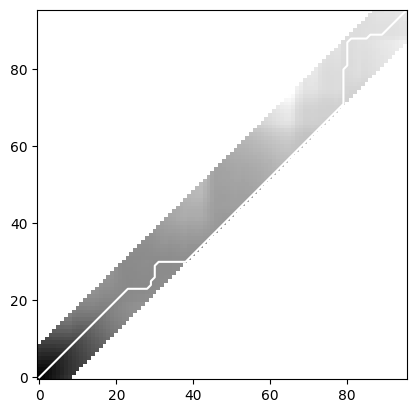

33.177128314088534

In [0]:
def HClustering():
  
  plt.style.use('default') 

  # a custom function that just computes Euclidean distance
  clusteringGlucoseX = []
  clusteringGlucose = allDaysGlucoseList[368:734]
  for i in range(len(clusteringGlucose)):
    clusteringGlucoseX.append(clusteringGlucose[i][0]) 
  DTW(clusteringGlucoseX[5], clusteringGlucoseX[10])
  
  clusteringBasalX = []
  clusteringBasal = allDaysBasalList[368:734]
  for i in range(len(clusteringBasal)):
    clusteringBasalX.append(clusteringBasal[i][0]) 
  
  clusteringBolusX = []
  clusteringBolus = allDaysBolusList[368:734]
  for i in range(len(clusteringBolus)):
    clusteringBolusX.append(clusteringBolus[i][0])   

  totalInsulinX = []
  for i in range(len(clusteringBasalX)):
    tmp = []
    for j in range(len(clusteringBasalX[i])):
      tmp.append(1000 * (clusteringBasalX[i][j] + clusteringBolusX[i][j]))
    totalInsulinX.append(tmp)


  # Optional way of only looking at trend 
  '''
  for i in range(len(clusteringGlucoseX)):
    minimum = min(clusteringGlucoseX[i])
    maximum = max(clusteringGlucoseX[i])
    for j in range(len(clusteringGlucoseX[i])):
      clusteringGlucoseX[i][j] = (clusteringGlucoseX[i][j] - minimum)/(maximum-minimum)  
  '''  

  X = clusteringGlucoseX

  # Make the Clusters
  #Z = hac.linkage(X, method='average', metric='euclidean')
  Z = hac.linkage(X, method = 'average', metric=DTW)


  # Dendrogram with more information (Key part is max_d)
  plt.figure(figsize=(15, 10))
  fancy_dendrogram(
      Z,
      leaf_rotation=90.,
      max_d=27,
      annotate_above=15,
  )
  plt.show()


  max_d = 27
  clusters = fcluster(Z, max_d, criterion='distance')

  # changes the cluster list so it will only reflect clusters with more than 6 elements (everything else gets set to cluster 0 for "outlier")
  countList = []
  editedClusters = []
  for i in range(100):
    count = 0
    for j in range(len(clusters)):
      if (clusters[j] == i):
        count += 1
    countList.append(count) 
  for i in range(len(clusters)):
    if (countList[clusters[i]] > 6):
      editedClusters.append(clusters[i])
    else:
      editedClusters.append(0)

  # puts a list of each series into the cluster dictionary according to which cluster it is in  
  clusterDict = {}
  indexCount = 0
  for i in range(len(editedClusters)):
    tmpList = []
    if (editedClusters[i] not in clusterDict):
      clusterDict[editedClusters[i]] = [] 
    tmpList = clusterDict[editedClusters[i]]  
    tmpList.append(X[indexCount])
    clusterDict[editedClusters[i]] = tmpList
    indexCount += 1 

  clusterDictInsulin = {}
  indexCount = 0
  for i in range(len(editedClusters)):
    tmpList = []
    if (editedClusters[i] not in clusterDictInsulin):
      clusterDictInsulin[editedClusters[i]] = [] 
    tmpList = clusterDictInsulin[editedClusters[i]]  
    tmpList.append(totalInsulinX[indexCount])
    clusterDictInsulin[editedClusters[i]] = tmpList
    indexCount += 1 

  # Creates a dictionary of next cluster percentages (prediction accuracy)    
  keys = list(clusterDict.keys())     
  listOfClusters = list(editedClusters)    
  nextPrediction = {}
  for i in keys:
    predictions = {}
    count = 0
    for j in range(len(listOfClusters) - 1):
      if (listOfClusters[j] == i):
        count += 1
        if (listOfClusters[j + 1] not in predictions):
          predictions[listOfClusters[j + 1]] = 1
        else:
          predictions[listOfClusters[j + 1]] = predictions[listOfClusters[j + 1]] + 1
    for k in predictions:
      predictions[k] = int(100 * predictions[k]/count)
    nextPrediction[i] = predictions  


  # Averages all the points in a cluster to create and print a centroid for each cluster
  centroidDict = clusterDict.copy()
  for i in centroidDict:
    centroid = []
    count = 0
    for j in range(len(centroidDict[i][0])):
      for k in range(len(centroidDict[i])):
        count += centroidDict[i][k][j]
      centroid.append(count/len(centroidDict[i]))  
      count = 0 
    centroidDict[i] = centroid  

  centroidDictInsulin = clusterDictInsulin.copy()
  for i in centroidDictInsulin:
    centroid = []
    count = 0
    for j in range(len(centroidDictInsulin[i][0])):
      for k in range(len(centroidDictInsulin[i])):
        count += centroidDictInsulin[i][k][j]
      centroid.append(count/len(centroidDictInsulin[i]))  
      count = 0 
    centroidDictInsulin[i] = centroid   

  for i in centroidDict:
    plt.plot(centroidDict[i])
    plt.plot(centroidDictInsulin[i])
    print(i)
    print(len(clusterDict[i]))
    plt.show()   

# Main()

This block of raw code contains all the actual execution of code.  By running the whole block, you will execute all the functions contained within this document on the data, and the output will appear below.  

The process of loading the data into bins for all the data can take a signficant amount of time, though; approximately 20 minutes.  The kmeans clustering can also take about 5 minutes.



#THINGS TO LOOK BACK AT
Look at the "smoothing" of basal and bolus values in the bin formatting functions

Make sure time zones are correct 

(done) ADD TIMES TO KEEP THROUGH TO GRAPHING!!!

make bins in the "right" order

only take most common cluster into account for this next test???

In [0]:
"""
We now import the file names from a csv file, and create a 4 dimensional list
called personBinList that contains each person, and within each person, their 
glucose, basal, and bolus, and within each of those, their respective bins.

WARNING: The importation of all the data files (5 original + 66 new) takes a 
relatively long time (about 20 minutes).
"""

old, new = ImportFileNames("drive/Shared drives/Diabetes Data Science 2019/fileNames.csv")
allPersonList = []
for i in old:
  cgm, bas, bol, start, end = ImportData(i, "old")
  print(i)
  personBinList = []
  gBins = CreateGlucoseBins("old", start, end)
  personBinList.append(gBins)
  personBinList.append(CreateBasalBins("old", start, end))
  personBinList.append(CreateBolusBins("old", start, end))
  allPersonList.append([personBinList, i])
for i in new: 
  cgm, bas, bol, start, end = ImportData(i, "new")
  print(i)
  personBinList = []
  gBins = CreateGlucoseBins("new", tz, start, end)
  personBinList.append(gBins)
  personBinList.append(CreateBasalBins("new", tz, start, end))
  personBinList.append(CreateBolusBins("new", tz, start, end))
  allPersonList.append([personBinList, i])

  plt.plot(allDaysGlucoseList[0][0])
  plt.show()

allDaysGlucoseList, allDaysBasalList, allDaysBolusList = executeFormatting("days", 1/12)    
len(allDaysGlucoseList)
#Kmeans clustering function call
kMeansClustering(8)
    
allDaysGlucoseList, allDaysBasalList, allDaysBolusList = executeFormatting(8760, 0.5)       
SARIMAX()    
    
allDaysGlucoseList, allDaysBasalList, allDaysBolusList = executeFormatting("days", 3/12)  
HClustering()  





[[datetime.datetime(2018, 6, 11, 0, 0),
  127.8558684,
  datetime.datetime(1, 1, 1, 0, 5),
  'Weekday'],
 [datetime.datetime(2018, 6, 11, 0, 5),
  124.09920000000001,
  datetime.datetime(1, 1, 1, 0, 5),
  'Weekday'],
 [datetime.datetime(2018, 6, 11, 0, 10),
  126.13068600000001,
  datetime.datetime(1, 1, 1, 0, 5),
  'Weekday'],
 [datetime.datetime(2018, 6, 11, 0, 15),
  131.2995972,
  datetime.datetime(1, 1, 1, 0, 5),
  'Weekday'],
 [datetime.datetime(2018, 6, 11, 0, 20),
  133.9172688,
  datetime.datetime(1, 1, 1, 0, 5),
  'Weekday'],
 [datetime.datetime(2018, 6, 11, 0, 25),
  137.82727139999997,
  datetime.datetime(1, 1, 1, 0, 4, 59),
  'Weekday'],
 [datetime.datetime(2018, 6, 11, 0, 30),
  139.8189336,
  datetime.datetime(1, 1, 1, 0, 4, 59),
  'Weekday'],
 [datetime.datetime(2018, 6, 11, 0, 35),
  141.87708,
  datetime.datetime(1, 1, 1, 0, 5),
  'Weekday'],
 [datetime.datetime(2018, 6, 11, 0, 40),
  141.87708,
  datetime.datetime(1, 1, 1, 0, 5),
  'Weekday'],
 [datetime.datetime(201